# Assignment 4

In [1]:
# histogram of speeds
# histogram of length of activities

# for certain activities:
# violin plot of heart rates

# activity vs enhanced_speed
# activity vs heart_rate
# activity vs change in enhanced_altitude
# speed vs heart_rate for certain activities
# for the same distance, has there been a change in heart_rate over time?



# 3D map of terrain (lat x long x alt)

In [2]:
# Rule 1: Tell a story for an audience
# Rule 2: Document the process, not just the results
# Rule 3: Use cell divisions to make steps clear
# Rule 4: Modularize code- wrap code you are about to copy and reuse in a function
# Rule 5: Record dependencies- Listing the versions of critical dependencies in the notebook itself (best done at the bottom) will ensure that, if used in isolation from its environment, the notebook still contains critical information to help readers run it.
# Rule 6: Use version control- since notebooks contain code and code inevitably contains bugs, being able to determine the history of when a given bug you have discovered was introduced to the code versus when it was fixed—and thus what analyses it may have affected—is a key capability in scientific computation
# Rule 7: Build a pipeline- a well-designed notebook can be generalized into a pipeline that easily repeats that analysis using different input data and parameters. With this end in mind, design your notebook from the beginning to allow such future repurposing. Place key variable declarations, especially those that will be changed when doing a new analysis, at the top of the notebook rather than burying them somewhere in the middle. Perform preparatory steps, like data cleaning, directly in the notebook and avoid manual interventions.
# Rule 8: Share and explain your data- Ideally, you will share your entire data set alongside your notebooks. We realize many data sets are too large or too sensitive to share this way. In these cases, consider breaking down large and complex data sets into tiers such that, even if the raw data are prohibitively large to include alongside your published notebooks or are constrained by privacy or other access issues, reproducibility and interpretability isn’t lost. You can host public copies of medium-sized, anonymized data in a variety of hosting services (for example, figshare [https://figshare.com/], zenodo [https://zenodo.org/]), and include further processed data sets alongside the notebooks in the final repository. To uniquely and permanently identify data sets, these hosting services provide Digital Object Identifiers (dois). This tiered approach both provides public confidence and allows others to reproduce and reuse the latter stages of an analysis even without access to the full, raw data set.
# Rule 9: Design your notebooks to be read, run, and explored
# Rule 10: Advocate for open research

# from: https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1007007

In [3]:
import pandas as pd
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# and we’ll also load the mplot3d toolkit that is included with the Matplotlib. It's responsible for rendering
# 2d plots in a 3d plan.
from mpl_toolkits import mplot3d

# Three-dimensional plotting is one of the functionalities that benefits immensely from viewing figures
# interactively rather than statically in the notebook, so to use interactive figures, you can use %matplotlib
# notebook rather than %matplotlib inline.
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [16.0,8.0]

In [4]:
#data = assets.find("strava.csv")
df=pd.read_csv("strava.csv")
pd.set_option('display.max_columns', None)
df.head()

,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,datafile,distance,enhanced_altitude,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed,timestamp,unknown_87,unknown_88,unknown_90
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,0.00,NaN,0.000,0.0,68.0,NaN,NaN,0.0,2019-07-08 21:04:03,0.0,300.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,0.00,NaN,0.000,0.0,68.0,NaN,NaN,0.0,2019-07-08 21:04:04,0.0,300.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,activities/2675855419.fit.gz,1.32,NaN,1.316,0.0,71.0,NaN,NaN,1316.0,2019-07-08 21:04:07,0.0,300.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3747.0,77.0,activities/2675855419.fit.gz,12.19,249.4,1.866,0.0,77.0,504432050.0,-999063637.0,1866.0,2019-07-08 21:04:14,0.0,100.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3798.0,77.0,activities/2675855419.fit.gz,14.08,259.6,1.894,0.0,80.0,504432492.0,-999064534.0,1894.0,2019-07-08 21:04:15,0.0,100.0,NaN


In [5]:
print(df.columns)

Index(['Air Power', 'Cadence', 'Form Power', 'Ground Time',
       'Leg Spring Stiffness', 'Power', 'Vertical Oscillation', 'altitude',
       'cadence', 'datafile', 'distance', 'enhanced_altitude',
       'enhanced_speed', 'fractional_cadence', 'heart_rate', 'position_lat',
       'position_long', 'speed', 'timestamp', 'unknown_87', 'unknown_88',
       'unknown_90'],
      dtype='object')


In [6]:
summary = {
    col: {
        'Type': df[col].dtype,
        'Missing': df[col].isnull().sum(),
        'Unique': df[col].nunique()
    } for col in df.columns
}
summary_df = pd.DataFrame(summary).T
print(summary_df)

                         Type Missing Unique
Air Power             float64   22807     40
Cadence               float64   22802     43
Form Power            float64   22807     82
Ground Time           float64   22802    211
Leg Spring Stiffness  float64   22807     83
Power                 float64   22802    306
Vertical Oscillation  float64   22802     54
altitude              float64   25744    688
cadence               float64      22    112
datafile               object       0     64
distance              float64       0  39062
enhanced_altitude     float64      51    733
enhanced_speed        float64      10   1241
fractional_cadence    float64      22      2
heart_rate            float64    2294    127
position_lat          float64     192  36988
position_long         float64     192  38448
speed                 float64   25721    365
timestamp              object       0  40649
unknown_87            float64      22      1
unknown_88            float64    2294      2
unknown_90

In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

df = df.sort_values('timestamp')

df['time_diff'] = df['timestamp'].diff()

activity_gap = pd.Timedelta(minutes=10)

# Flag new activities
df['new_activity'] = df['time_diff'] > activity_gap

df['activity_id'] = df['new_activity'].cumsum()

print(df['activity_id'])

0         0
1         0
2         0
3         0
4         0
         ..
40644    60
40645    60
40646    60
40647    60
40648    60
Name: activity_id, Length: 40649, dtype: int64


In [8]:
# Clean up missing GPS data
df = df.dropna(subset=["position_lat", "position_long"])

# Convert GPS to degrees
df["position_lat_degrees"] = (df["position_lat"] * (180 / 2**31)).round().astype(int)
df["position_long_degrees"] = (df["position_long"] * (180 / 2**31)).round().astype(int)

# Round altitude
df['enhanced_alt_int'] = df["enhanced_altitude"].round().astype(int)

In [9]:
def activity_summary(df, activity_ids=None):
    """
    Summarize fitness activities in a DataFrame.

    Parameters:
    - df: pandas DataFrame with fitness data
    - max_activities: number of activities to summarize if activity_ids is not provided
    - activity_ids: list of specific activity IDs to summarize

    Returns:
    - summary_df: summary DataFrame with min, max, and range values per activity
    """
    summary_rows = []

    # Determine which activity IDs to use
    if activity_ids is not None:
        target_ids = activity_ids
    else:
        target_ids = df['activity_id'].sort_values().unique()

    # Loop through selected activities
    for activity_id in target_ids:
        group = df[df['activity_id'] == activity_id]

        row = {'activity_id': activity_id+1}

        # Get datafile name
        datafile = group['datafile'].unique()
        row['datafile'] = datafile[0] if len(datafile) > 0 else 'Unknown'

        # Columns of interest
        columns_of_interest = [
            'distance',
            'enhanced_alt_int',
            'enhanced_speed',
            'heart_rate',
            'position_lat_degrees',
            'position_long_degrees'
        ]

        # Compute stats
        for col in columns_of_interest:
            if col in group.columns:
                col_min = group[col].min()
                col_max = group[col].max()
                row[f'{col}_min'] = col_min
                row[f'{col}_max'] = col_max
                row[f'{col}_range'] = col_max - col_min
            else:
                row[f'{col}_min'] = None
                row[f'{col}_max'] = None
                row[f'{col}_range'] = None

        # Start time
        row['start_time'] = group['timestamp'].min()
        summary_rows.append(row)

    # Final DataFrame
    min_max_df = pd.DataFrame(summary_rows)
    cols = ['start_time'] + [col for col in min_max_df.columns if col != 'start_time']
    min_max_df = min_max_df[cols]
    return min_max_df

activity_df = activity_summary(df)
activity_df
#summary_df.head()

,start_time,activity_id,datafile,distance_min,distance_max,distance_range,enhanced_alt_int_min,enhanced_alt_int_max,enhanced_alt_int_range,enhanced_speed_min,enhanced_speed_max,enhanced_speed_range,heart_rate_min,heart_rate_max,heart_rate_range,position_lat_degrees_min,position_lat_degrees_max,position_lat_degrees_range,position_long_degrees_min,position_long_degrees_max,position_long_degrees_range
0,2019-07-08 21:04:14,1,activities/2675855419.fit.gz,12.19,2617.46,2605.27,242,290,48,0.000,3.144,3.144,77.0,137.0,60.0,42,42,0,-84,-84,0
1,2019-07-10 23:18:00,2,activities/2677658978.fit.gz,0.00,849.94,849.94,247,270,23,0.000,3.210,3.210,71.0,143.0,72.0,42,42,0,-84,-84,0
2,2019-07-12 21:27:11,3,activities/2682705331.fit.gz,1.82,7473.66,7471.84,219,310,91,1.325,3.480,2.155,73.0,126.0,53.0,42,42,0,-84,-84,0
3,2019-07-14 17:20:28,4,activities/2688518063.fit.gz,1.27,8472.28,8471.01,229,331,102,1.129,2.519,1.390,97.0,125.0,28.0,42,42,0,-84,-84,0
4,2019-07-14 20:45:07,5,activities/2688898988.fit.gz,0.73,2613.32,2612.59,245,319,74,0.000,3.863,3.863,86.0,132.0,46.0,42,42,0,-84,-84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2019-09-25 19:17:25,57,activities/2903861013.fit.gz,0.00,7886.55,7886.55,220,291,71,0.000,13.296,13.296,NaN,NaN,NaN,42,42,0,-84,-84,0
57,2019-09-25 21:42:05,58,activities/2904156632.fit.gz,0.00,15606.88,15606.88,238,298,60,0.000,13.362,13.362,78.0,160.0,82.0,42,42,0,-84,-84,0
58,2019-09-28 21:51:12,59,activities/2912139332.fit.gz,5.26,12157.82,12152.56,227,293,66,0.000,13.268,13.268,124.0,155.0,31.0,42,42,0,-84,-84,0
59,2019-09-30 21:25:34,60,activities/2917827233.fit.gz,0.00,39007.12,39007.12,232,313,81,0.000,13.921,13.921,NaN,NaN,NaN,42,42,0,-84,-84,0


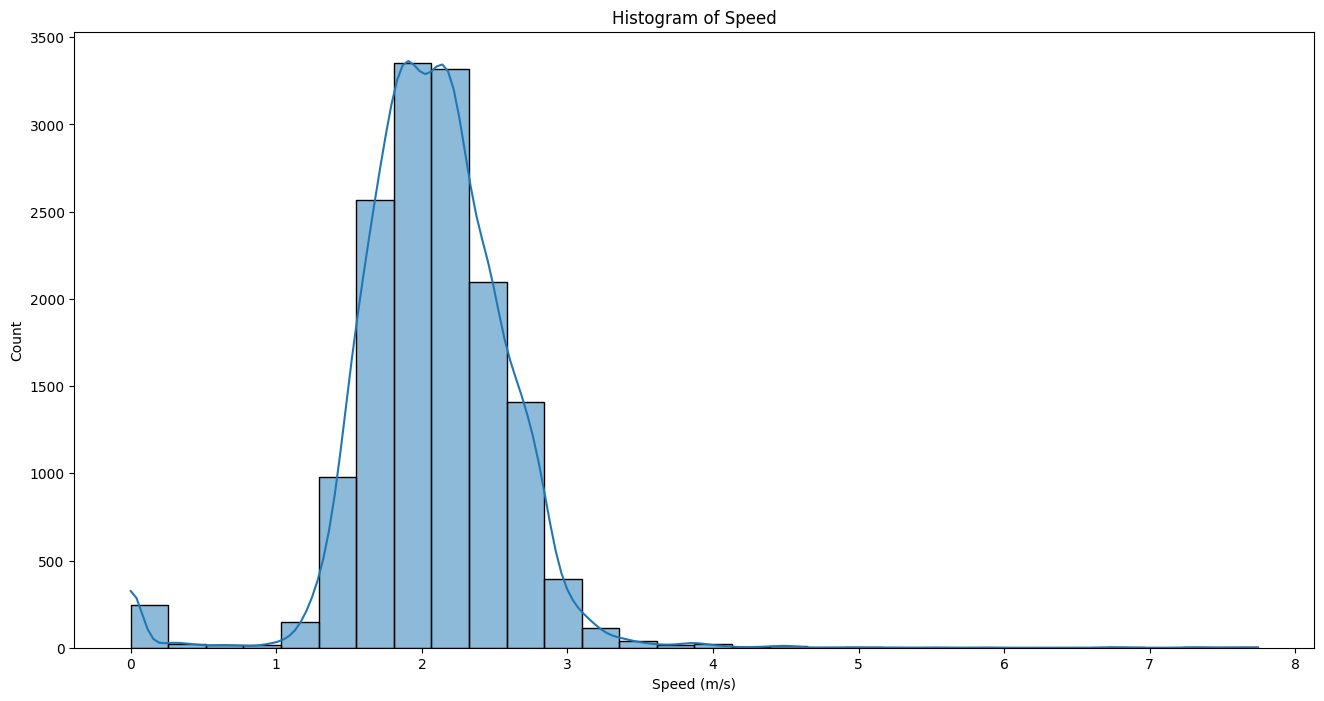

In [10]:
#change to enhanced_speed

import seaborn as sns
import matplotlib.pyplot as plt

# Drop missing values if needed
df['speed'] = df['speed']/1000

sns.histplot(df['speed'].dropna(), bins=30, kde=True)

plt.title('Histogram of Speed')
plt.xlabel('Speed (m/s)')
plt.ylabel('Count')
plt.show()

#Average speed is around 2 m/s, highest is around 4 m/s

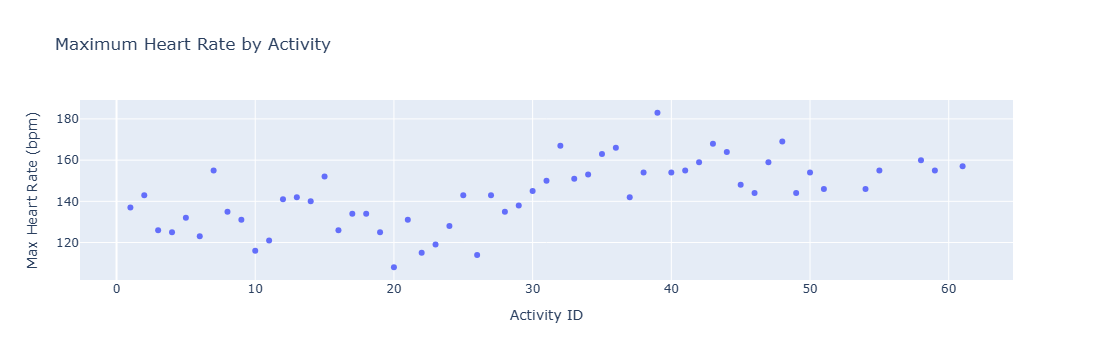

In [11]:
import plotly.express as px

#summary_df = activity_summary(df)
#summary_df.head()

def hover_max_heart_rate(df, title='Maximum Heart Rate by Activity'):
    """
    Create an interactive scatterplot of maximum heart rate by activity.
    
    Parameters:
    - summary_df: DataFrame with 'activity_id' and 'heart_rate_max' columns
    - title: Title for the plot (optional)
    """
    df_plot = df.reset_index()
    #print(df_plot)
    
    fig = px.scatter(
        df_plot,
        x='activity_id',
        y='heart_rate_max',
        title=title,
        labels={
            'activity_id': 'Activity ID',
            'heart_rate_max': 'Max Heart Rate (bpm)'
        },
        hover_data=['activity_id', 'heart_rate_max']
    )
    fig.show()
    
#activity_df
hover_max_heart_rate(activity_df)

C:\Users\megaallen\PythonJupyter\Lib\site-packages\numpy\linalg\_linalg.py:2431: RuntimeWarning:

invalid value encountered in det



dict_keys(['bodies', 'cmeans', 'cmaxes', 'cmins', 'cbars', 'cmedians'])


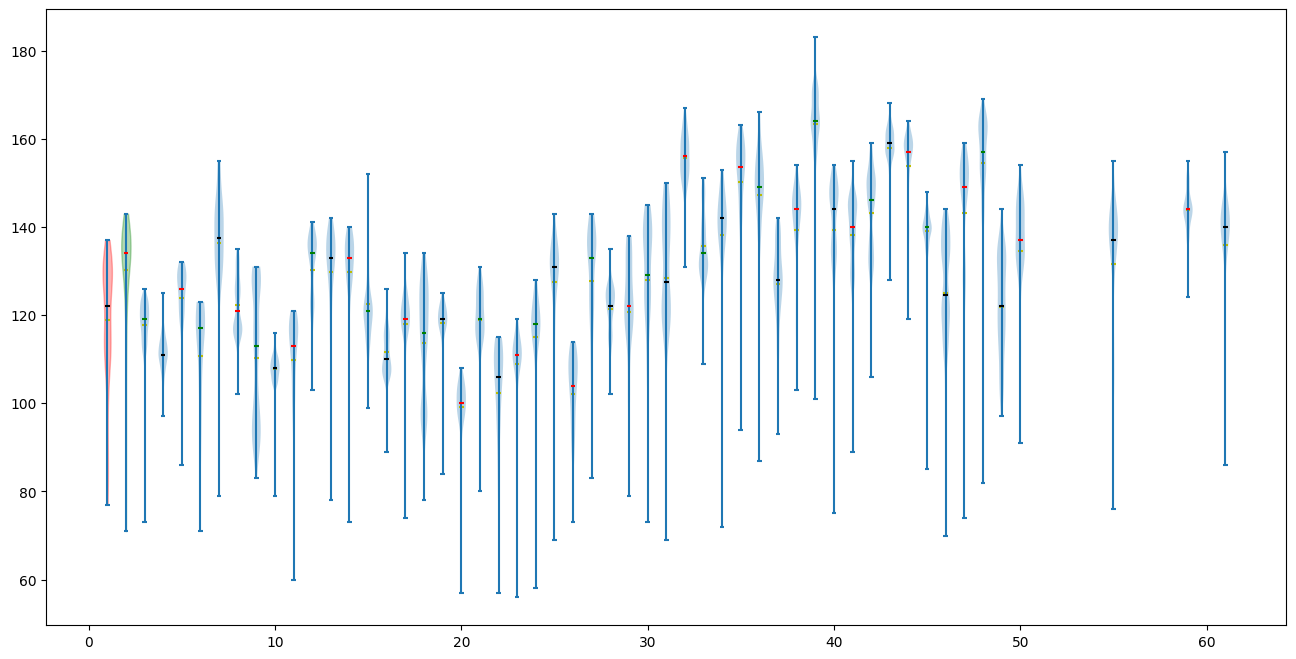

In [12]:
#df = activity_df.groupby('activity_id')
heart_rate_df = df.groupby('activity_id')['heart_rate'].apply(list)
heart_rate_df

def heart_rate_violin(Distributions, showmeans=True, showmedians=True):
    #show Components 
    violinplt = plt.violinplot(Distributions, showmeans=True, showmedians=True  );
    #print (violinplt)
    print (violinplt.keys())
    violinplt['cmeans'].set_color('y')
    violinplt['bodies'][0].set_color('r')
    violinplt['bodies'][1].set_color('g')

    # note violin plot requires slightly different syntax for each of the components
    violinplt['cmedians'].set_color(('k','r', 'g'))



# heart_rate_violin
heart_rate_violin(heart_rate_df)
    
    

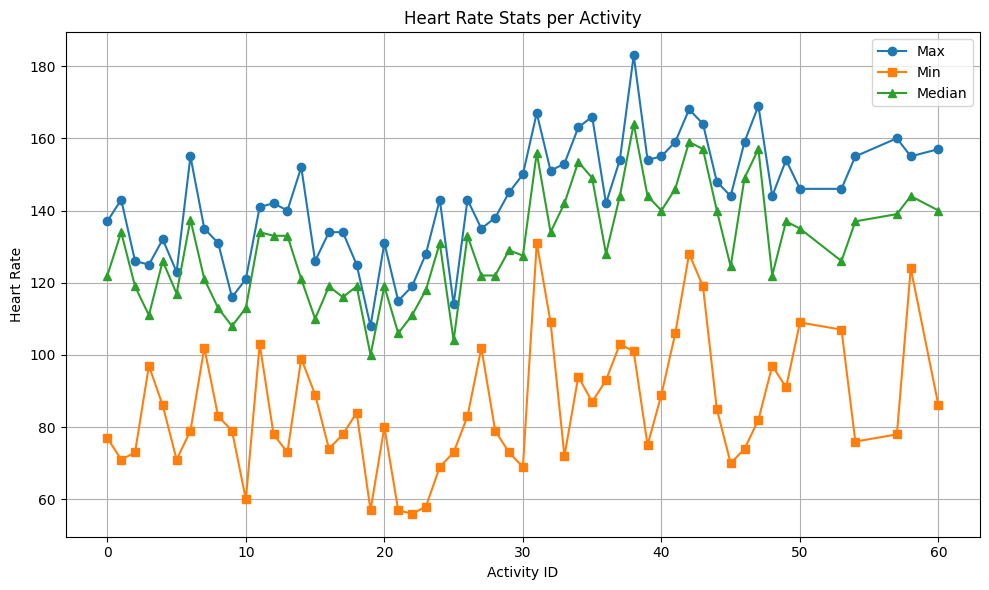

In [13]:
#df = activity_df.groupby('activity_id')
heart_rate_df = df.groupby('activity_id')['heart_rate'].agg(['max', 'min', 'median']).dropna()
heart_rate_df

heart_rate_df = df.groupby('activity_id')['heart_rate'].agg(['max', 'min', 'median']).dropna()

# Plot
plt.figure(figsize=(10, 6))

plt.plot(heart_rate_df.index, heart_rate_df['max'], label='Max', marker='o')
plt.plot(heart_rate_df.index, heart_rate_df['min'], label='Min', marker='s')
plt.plot(heart_rate_df.index, heart_rate_df['median'], label='Median', marker='^')

plt.xlabel('Activity ID')
plt.ylabel('Heart Rate')
plt.title('Heart Rate Stats per Activity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

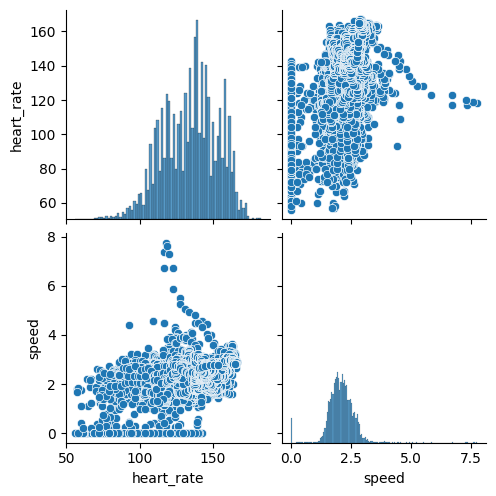

In [14]:
cols = ['heart_rate', 'speed']
sns.pairplot(df[cols])

#Speed becomes lower when heart rate gets too high

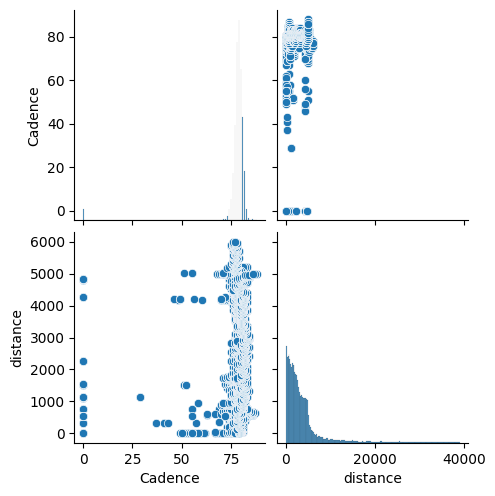

In [15]:
cols = ['Cadence', 'distance']
sns.pairplot(df[cols])

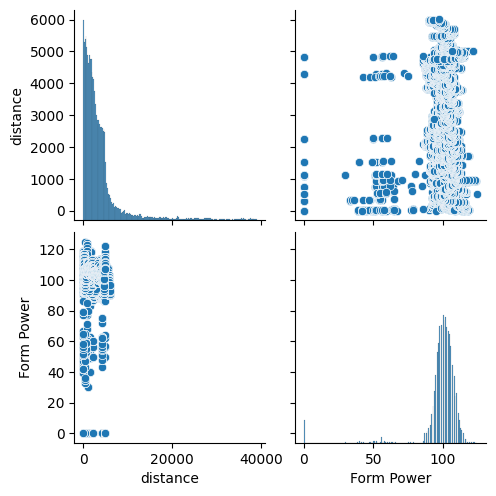

In [16]:
cols = ['distance', 'Form Power']
sns.pairplot(df[cols])